<a href="https://colab.research.google.com/github/Charlotte1997AAU/MachineLearningProject/blob/main/Charlotte_ML_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup environment

In [ ]:
import sys
assert sys.version_info >= (3, 7)

from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import io
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn. model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Upload the relevant files, in this case download the adult data set and upload adult.data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['adult.data']))
#dftest = pd.read_csv(io.BytesIO(uploaded['adult.test']))
#Column names to be added
df.columns = ['age', 'workclass', "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#Looking at the data/Data analysis

I use the info() methiod to get a quick description of the data.I also use head() to see the first 5 entries to get a feel of the structure of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In this we can see the total number of columns and rows, we can also see the type, many features are objects and number of entries. We can check which categories exist by using the value_counts() method and the first 5 entries to get a look at the data structure:

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

As an example i used 'workclass' which has missing values, we can see that 1836 points of data do not have values. All features with missing values will be adressed later. By doing this i have observed 3 features with missing value, they are: 'workclass', 'occupation' and 'native-country', missing 1836, 1843, and 583 values respectively. They will be dealt with later

In [ ]:
each_cat = df['income'].value_counts('>50K')

print("People making over or at most 50K:{}".format(each_cat))



People making over or at most 50K: <=50K    0.759183
 >50K     0.240817
Name: income, dtype: float64


This quickly shows us that roughly 76% of the people in the training data makes at most 50K a year and that 24% makes more than 50K a year. So the number of people in the data set making more than 50K is around one third of the people earning less than it.

To get a feel of the numerical data available, i make histograms and a description of the data with the describe() method, which shows a summary of the data.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

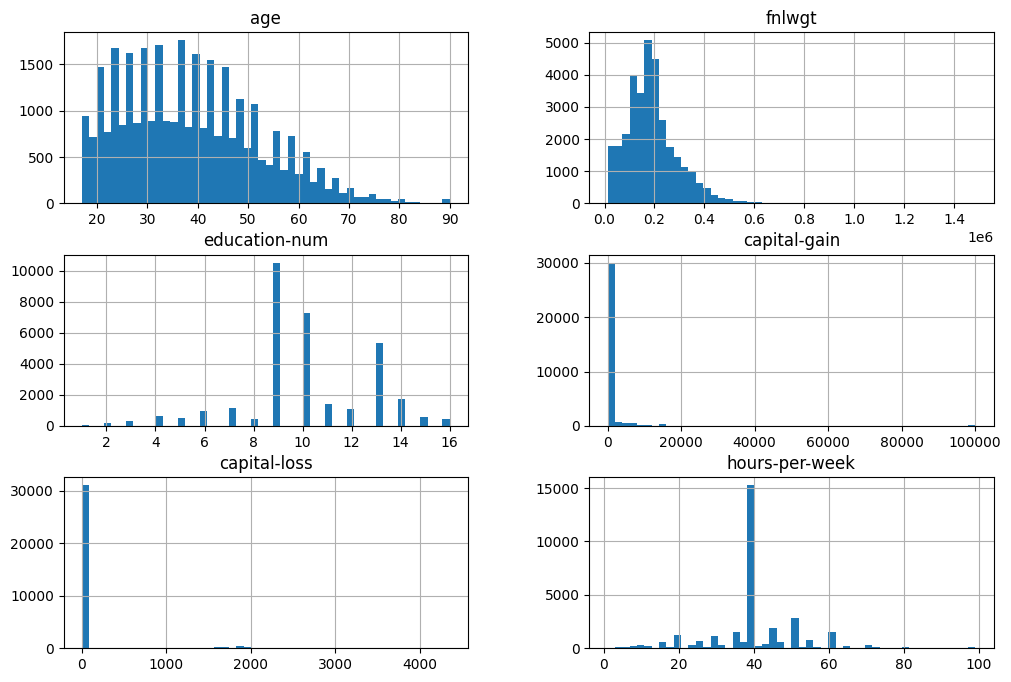

In [ ]:
df.hist(bins=50, figsize=(12,8))

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


When looking at the numerical data there is one thing to keep in mind.
'fnlwgt' looks wierd in this context and is not well represented either in the description or historgrams. 'fnlwgt' is the final weight and is basically the number of people the census believes the entry represents. It is a feature i will drop later in the process, when i get to cleaning the data.

# Correlation
Now i check if there is any correlation between the income and any of the other numerical values. In order to do this, whether they make more or less than 50k has to be a numerical value, so i will start by replacing that. If they make at most 5k it will be denoted as 0, and if they make more it will be denoted as 1.

In [ ]:
df.replace('<=50K', 0, inplace=True, regex = True)
df.replace('>50K', 1, inplace=True, regex = True)

In [ ]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64

In [ ]:
corr_matrix = df.corr()

<ipython-input-60-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_matrix["income"].sort_values(ascending=False)

income            1.000000
education-num     0.335182
age               0.234039
hours-per-week    0.229690
capital-gain      0.223333
capital-loss      0.150523
fnlwgt           -0.009481
Name: income, dtype: float64

<ipython-input-62-f0a21b0eb99d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues_r', annot = True)


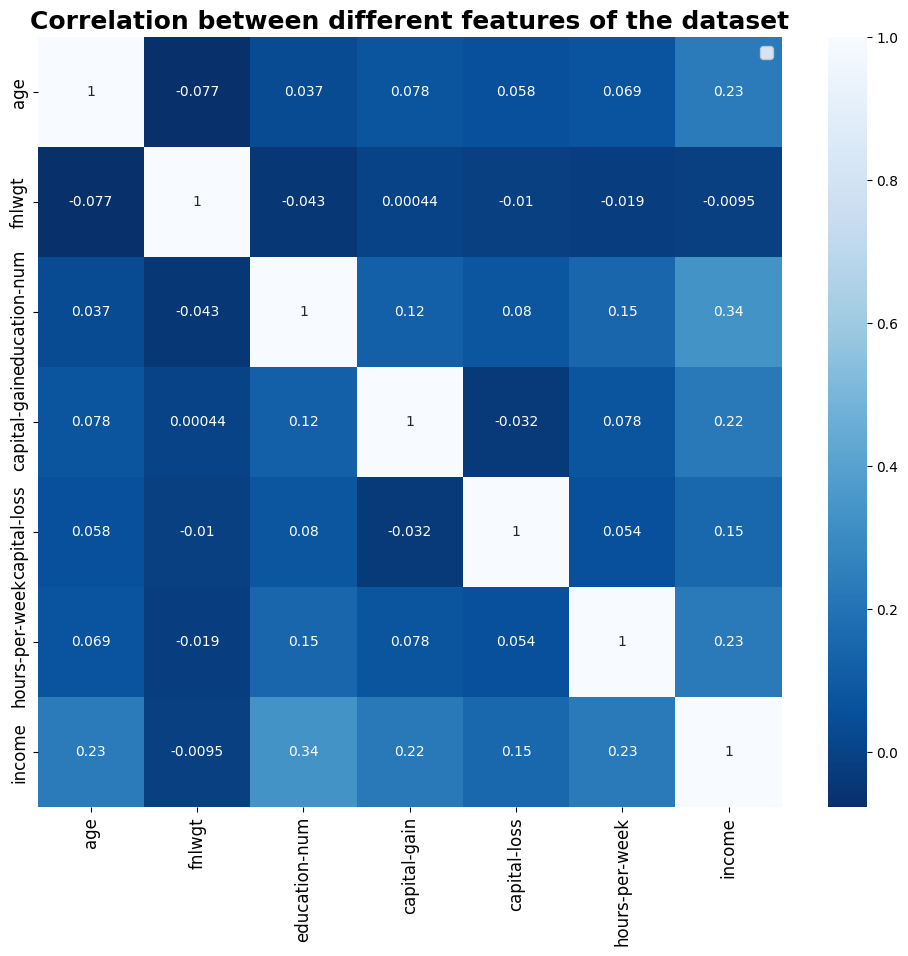

In [ ]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Blues_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

As can be seen from the corr_matrix code and matrix, is that most of the features are slightly positively correlated with the income variable.

# Missing values / Imputation / Cleaning the data
Now i will adress the missing values, as mentioned earlier, there is missing values in 3 cateogries. \
Workclass = 1836, Occupation = 1843 and Native-country = 583.
I will do imputation on the attributes with missing values. \
When the missing values are categorical a common method is to replace the missing value and replace with the most common value. Which is what i will do aswell for all three. \
First i will find how many percentage of each is missing, and then find the most common of all tree attributes and then i will replace them with the appropriate value

In [ ]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
  num_non = df[c].isin([" ?"]).sum()
  if num_non > 0:
    print (c)
    print(num_non)
    print("{0:.2f}%".format(float(num_non)/num_data * 100))

workclass
1836
5.64%
occupation
1843
5.66%
native-country
583
1.79%


This code quickly shows how many percentage of each feature is missing.

In [ ]:
for c in col_names:
  num_non = df[c].isin([" ?"]).sum()
  if num_non > 0:
    count = Counter(df[c])
    common = count.most_common(1)[0][0]
    print("The most common value in {} is:{}".format(c, common) )



The most common value in workclass is: Private
The most common value in occupation is: Prof-specialty
The most common value in native-country is: United-States


We have established that the most common in each attribute is:\
workclass: private\
occupation: Prof-speciality\
native-country: United-states\
Therefore i will replace the missing values denoted with "?", with the corresponding most common value.

In [ ]:
for c in col_names:
  num_non = df[c].isin([" ?"]).sum()
  if num_non > 0:
    count = Counter(df[c])
    common = count.most_common(1)[0][0]
    df.replace('\?',common, inplace = True, regex = True)
    df.replace(" ", "", inplace = True, regex = True)

Now i have replaced all '?' values with the value that is most occuring in the corresponding column. It will be demonstrated in the next code snippet which loops though all the columns and checks if any values are '?'.

In [ ]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
  num_non = df[c].isin([" ?"]).sum()
  if num_non > 0:
    print (c)
  else:
    print("No '?' values")

No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values
No '?' values


I will throw out educatin and fnlwgt since we have education in a numbered system already, and fnlwgt does not matte in this context.

In [ ]:
df = df.drop(['education', 'fnlwgt'], axis = 1)
df.head(8)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


# Handle categorical attributes
In this dataset much of the data is categorical and there is a limited number of values for each feature.
The text categories are:\

*   Workclass
*   Marital status
*   Occupation
*   Relationship
*   Race
*   Sex
*   Native coutry

For converting the categories to numbers i will use Scikit-learn's Label Encoder. Before doing any converting i will copy the dataset so i know that i keep the original. Label encoder simply gives each category a number, just as i did with the income variable. Label encoding can introduce a new problem, because one type workclass and country is not necesarrily better than others, but with label encoding it automatically thinks that cateogries labelled 4 are better than the cateogry labelled 2. However i made a decision that there are not enough categories to make a huge difference and it is a much simpler approach, so this will be what i do in the first try. If the model performs poorly i will return to the encoding and see what happens with One Hot encoding.


In [ ]:
df_copy = df.copy(deep=True)


In [ ]:
cat_encoder = LabelEncoder()
df_copy['workclass'] = cat_encoder.fit_transform(df_copy['workclass'])
df_copy['marital-status'] = cat_encoder.fit_transform(df_copy['marital-status'])
df_copy['occupation'] = cat_encoder.fit_transform(df_copy['occupation'])
df_copy['relationship'] = cat_encoder.fit_transform(df_copy['relationship'])
df_copy['race'] = cat_encoder.fit_transform(df_copy['race'])
df_copy['sex'] = cat_encoder.fit_transform(df_copy['sex'])
df_copy['native-country'] = cat_encoder.fit_transform(df_copy['native-country'])



In [ ]:
df_copy

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,5,13,2,3,0,4,1,0,0,13,39,<=50K
1,38,3,9,0,5,1,4,1,0,0,40,39,<=50K
2,53,3,7,2,5,0,2,1,0,0,40,39,<=50K
3,28,3,13,2,10,5,2,0,0,0,40,4,<=50K
4,37,3,14,2,3,5,4,0,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,13,5,4,0,0,0,38,39,<=50K
32556,40,3,9,2,6,0,4,1,0,0,40,39,>50K
32557,58,3,9,6,0,4,4,0,0,0,40,39,<=50K
32558,22,3,9,4,0,3,4,1,0,0,20,39,<=50K


# Feature scaling
It is recommended to perform scaling on the numerical features, so the machine learning algorithm does not weight one type of numerical feature higher than the other.
For this purpose i will use a MinMax Scaler.

In [ ]:
scaler = MinMaxScaler()
numerical = ['age', 'workclass' ,'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'native-country', 'hours-per-week']

In [ ]:
df_copy[numerical] = scaler.fit_transform(df_copy[numerical])

In [ ]:
df_copy

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.452055,0.714286,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220,<=50K
1,0.287671,0.428571,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220,<=50K
2,0.493151,0.428571,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220,<=50K
3,0.150685,0.428571,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561,<=50K
4,0.273973,0.428571,0.866667,0.333333,0.214286,1.0,1.0,0.0,0.000000,0.0,0.397959,0.951220,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.428571,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.951220,<=50K
32556,0.315068,0.428571,0.533333,0.333333,0.428571,0.0,1.0,1.0,0.000000,0.0,0.397959,0.951220,>50K
32557,0.561644,0.428571,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.951220,<=50K
32558,0.068493,0.428571,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.951220,<=50K


Now i will collect all the data i need in one dataset, this means the current df_copy set should be merged with the converted categorical data

# Training the model, Stochastic Gradient Descent classifier


I split the training set in label and features. By simply creating a y variable with the income, and dropping the income from the dataset. I am going to train the model on two different models, SGDC and a Decision tree classifier to see the difference in the models performance. \
I chose SGDC because it is a good starting point, i use a Decision tree classifier because it is a good model for visualizing the entire route.

In [ ]:
y = df_copy['income']
x = df_copy.drop(['income'], axis = 1)

Now i'll make a train test split of the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
classifier = SGDClassifier()
classifier.fit(x_train, y_train)

SGDClassifier()

# SGDC Prediction results

In [ ]:
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      4977
        >50K       0.61      0.36      0.45      1535

    accuracy                           0.79      6512
   macro avg       0.71      0.64      0.66      6512
weighted avg       0.77      0.79      0.77      6512

79.3918918918919
[[4614  363]
 [ 979  556]]


For analyzing the prediction results and evaluating the model i have used classification report, which outputs precision, recall, f1 and support.\
**Precision**: The percentage of true positives, relative to the total nr of true positive. Out of all the people that the model predicted earns more than 50k, 74% actually do earn more than 50k\
**Recall**: The percentage of correct positive predictions, relative to actual positives. Out of all the people that actually make more than 50k the model only predicted correct for 39% of those people.\
**f1-score**: A weighted harmonic mean of precision and recall. The closer to 1 the better the model is. The f1-score is only 51 so it does not do a very good job of telling us if people earn more than 50k.
**Suport**: This simply tells us how mnay of people belongs in each category. 4995 makes 50k at most and 1517 earns more than 50k.\
**Accuracy** is the number of correct predicions over the total number of predictions, which is 82.49 %. This is a good number. But it can be misleadning when the class distribution is a imbalanced as here. It is important to classifiy the minority class correctly which is not high with this model as shown above.\

We can see in the confusion matric that it predicted 4614 correct to make at most 50k, and only 556 correct when it predicted that they made over 50k.

# Training model, Decision Tree Classifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=10)
tree_model = tree_model.fit(x_train, y_train)

In [ ]:
y_pred_t = tree_model.predict(x_test)
print(classification_report(y_test, y_pred_t))
print(accuracy_score(y_test, y_pred_t)*100)
print(confusion_matrix(y_test, y_pred_t))


              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4977
        >50K       0.74      0.60      0.66      1535

    accuracy                           0.86      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512

85.58046683046683
[[4646  331]
 [ 608  927]]


# Decision Tree Prediction Results
**Precision**: Out of all the people that the model predicted earns more than 50k, 75% actually do earn more than 50k\
**Recall**: This is where this models far outperforms the other model. Out of all the people that actually make more than 50k the model only predicted correct for 60% of those people.\
**f1-score**: The f1-score is also higher for the tree classifier, it scores 67 so it does a slightly better job of telling us if people earn more than 50k.\
**Accuracy**: 86.04 better than the SGDC.\
We can see in the confusion matric that it predicted 4646 correct to make at most 50k, and 927 correct when it predicted that they made over 50k. Here it is clear that it outperforms the SGD classifier

All in all the decision tree classifier out performs the SGD classifier\
Below is too different ways to visualize the tree, one shows it here, the other makes a PDF that can be open and zoomed in on to actually see the text.

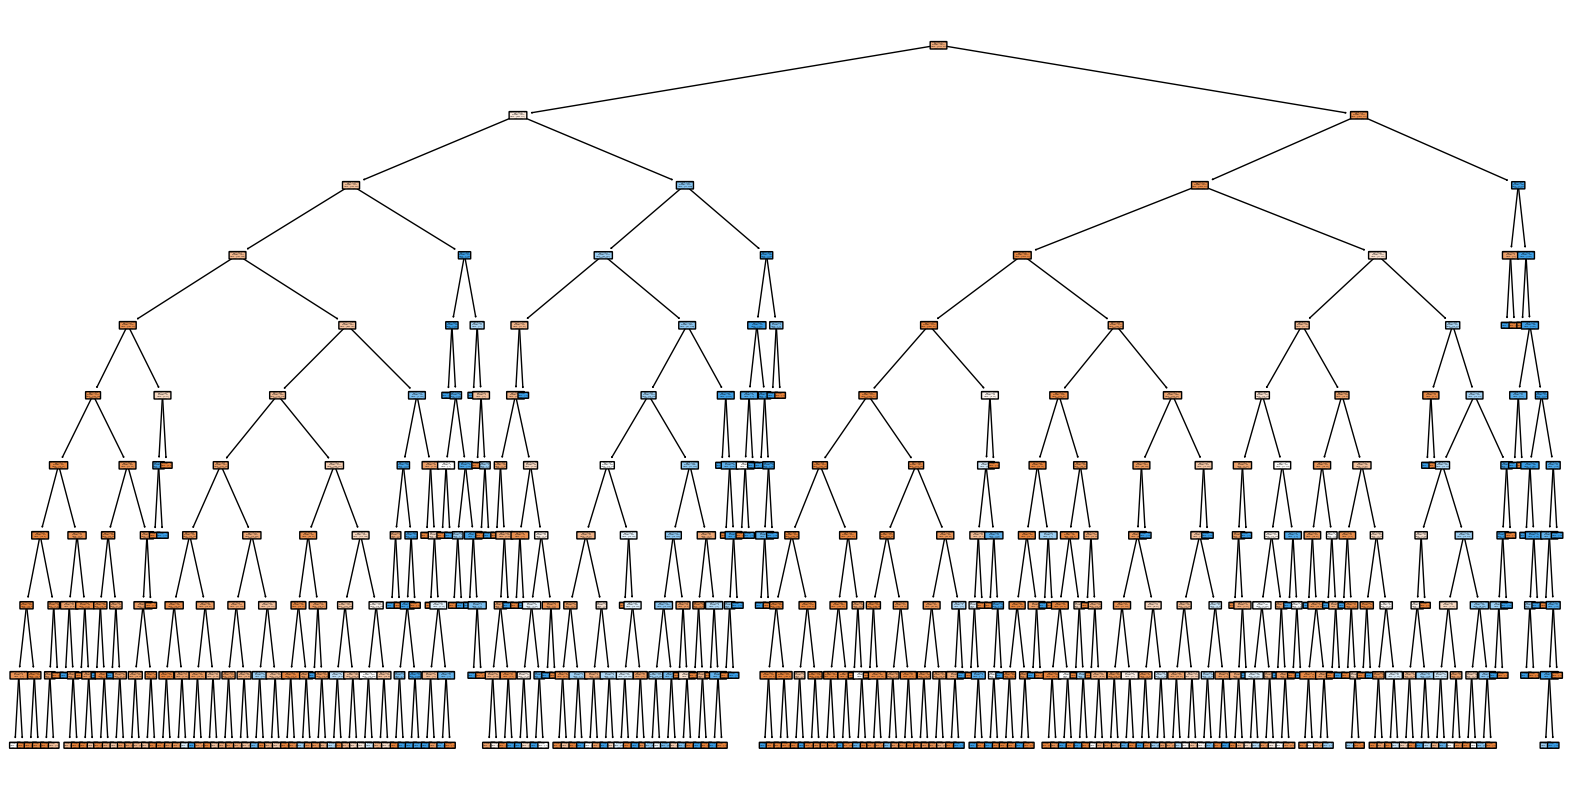

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, filled=True, feature_names=x_train.columns, class_names=True, rounded=True)
plt.show()

In [ ]:

from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=True,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the tree visualization as a PDF file
graph.view("decision_tree")    # This will open the PDF file using the default viewer


'decision_tree.pdf'